In [13]:
import json
import plotly
import pandas as pd

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords

from flask import Flask
from flask import render_template, request, jsonify
from plotly.graph_objs import Bar
from sklearn.externals import joblib
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Define tokenize function to reduce message complexity
def tokenize(text):
     """
    Tokenizes text data
    
    Arguments:
    text str: Messages as text data
    
    Returns:
    clean_tokens: Processed text after normalizing, tokenizing and lemmatizing
    """
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

In [15]:
# Load data
engine = create_engine('sqlite:////kaggle/input/disasterresponse/DisasterResponse.db')
df = pd.read_sql_table('DisasterResponse', engine)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


genre
direct    10766
news      13054
social     2396
Name: message, dtype: int64


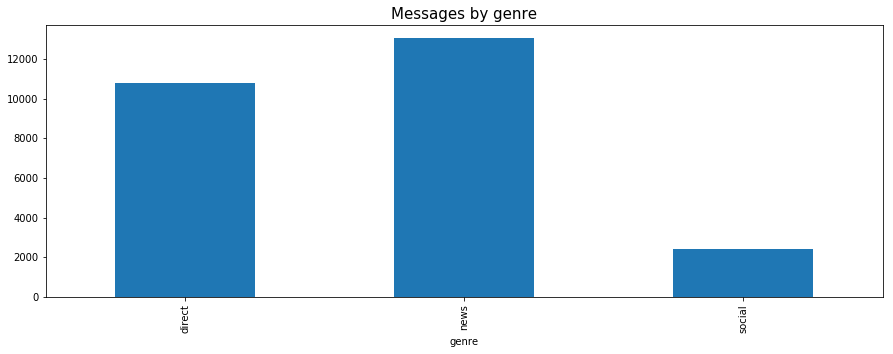

In [16]:
# Visualization 1: Messages by genre
# Displaying messages by genre is the default report used in the template
genre_counts = df.groupby('genre').count()['message']
genre_names = list(genre_counts.index)
print(genre_counts)

genre_counts.plot(kind="bar", figsize=(15,5));
plt.title('Messages by genre', fontsize=15);

related                   20282
request                    4474
offer                       118
aid_related               10860
medical_help               2084
medical_products           1313
search_and_rescue           724
security                    471
military                    860
child_alone                   0
water                      1672
food                       2923
shelter                    2314
clothing                    405
money                       604
missing_people              298
refugees                    875
death                      1194
other_aid                  3446
infrastructure_related     1705
transport                  1201
buildings                  1333
electricity                 532
tools                       159
hospitals                   283
shops                       120
aid_centers                 309
other_infrastructure       1151
weather_related            7297
floods                     2155
storm                      2443
fire    

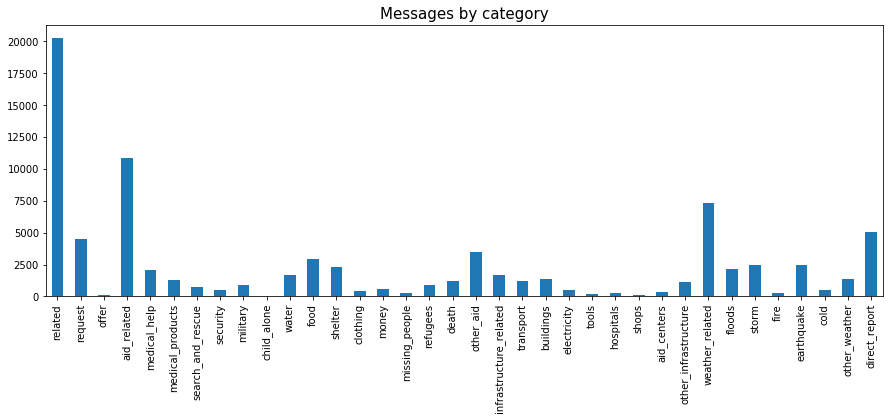

In [17]:
# Visualization 2: Messages by category
categories = df[df.columns[4:]].sum() #/len(df)
category_names = list(categories.index)
print(categories)
categories.plot(kind="bar", figsize=(15,5))
plt.title('Messages by category', fontsize=15);